### clustering 3 synthetic clusters with dbscan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
figsize = (12, 8)

#### data

In [3]:
n_samples = 750
random_state = 0
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=n_samples, centers=centers,
                            cluster_std=0.4, random_state=random_state)

In [4]:
X[:10]

array([[ 0.84022039,  1.14802236],
       [-1.15474834, -1.2041171 ],
       [ 0.67863613,  0.72418009],
       [ 0.45078298, -1.4270968 ],
       [ 1.49211627,  1.48095194],
       [-0.98194639, -0.06415008],
       [-1.02343462, -1.12701724],
       [ 0.93511262, -0.69222793],
       [ 1.45065437,  0.5680274 ],
       [ 1.37976832,  1.0350205 ]])

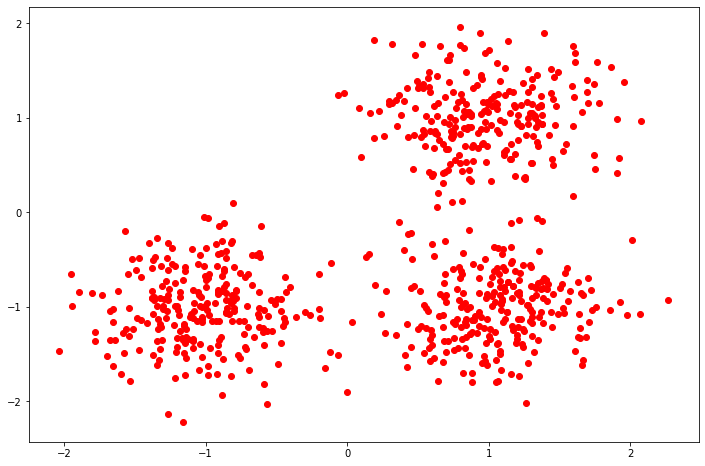

In [5]:
plt.figure(figsize=figsize)
plt.scatter(X[:, 0], X[:, 1], color='r')

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

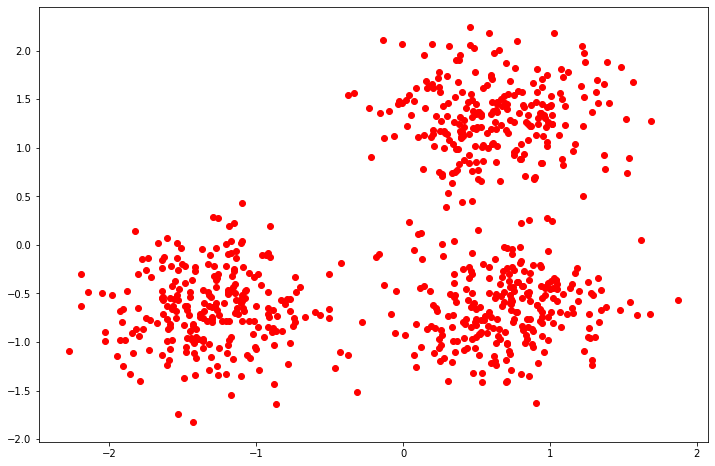

In [7]:
plt.figure(figsize=figsize)
plt.scatter(X[:, 0], X[:, 1], color='r')

#### # clustering

In [8]:
eps = 0.3
min_samples = 10
clusterer = DBSCAN(eps=eps, min_samples=min_samples)
db = clusterer.fit(X)

In [9]:
labels = db.labels_
labels[:10]

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0])

In [10]:
db.core_sample_indices_[:10]

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10])

In [11]:
core_samples_mask = np.zeros_like(labels, dtype = bool)
core_samples_mask[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [12]:
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[:10]

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [13]:
# number of clusters, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"estimated number of clusters: {n_clusters}")

estimated number of clusters: 3


In [14]:
print(f"homogeneity: {metrics.homogeneity_score(labels_true, labels)}")

homogeneity: 0.9530024020741487


In [15]:
print(f"v-measure: {metrics.v_measure_score(labels_true, labels)}")

v-measure: 0.9167651556382876


In [16]:
print(f"adjusted Rand index {metrics.adjusted_rand_score(labels_true, labels)}")

adjusted Rand index 0.9517085526151922


In [17]:
print(f"adjusted mutual information: {metrics.adjusted_mutual_info_score(labels_true, labels)}")

adjusted mutual information: 0.9164675863635577


In [18]:
print(f"silhouette coefficient: {metrics.silhouette_score(X, labels)}")

silhouette coefficient: 0.6255247640253795


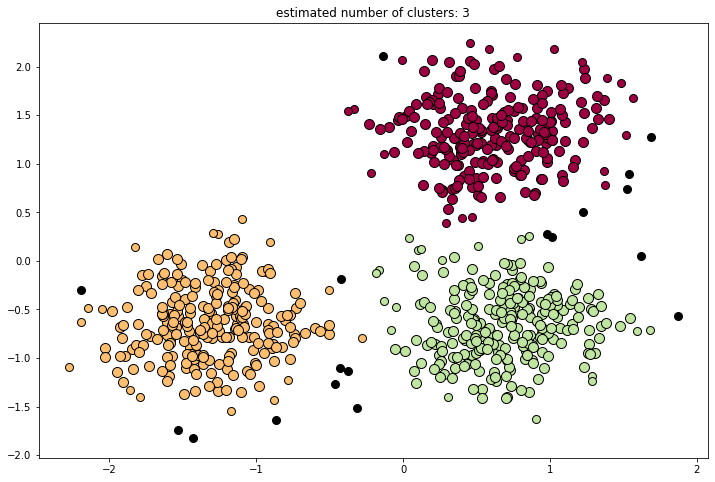

In [19]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
plt.figure(figsize=(12,8))
for k, color in zip(unique_labels, colors):
    if k == -1:
        color = 'k'
    cluster_member_mask = (labels == k)
    xy = X[cluster_member_mask & core_samples_mask]
    plt.plot(xy[: , 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=10)
    xy = X[cluster_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=color, markeredgecolor='k', markersize=8)
plt.title(f"estimated number of clusters: {n_clusters}")
plt.show()